### We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

# Import Libraries

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# To get the plots on same page
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomised data splitting functions
from sklearn.linear_model import LinearRegression

# Load and review data

In [78]:
car_df = pd.read_csv("https://raw.githubusercontent.com/AnubhaT-code/Supervised-Learning/main/auto-mpg%20Dataset.csv")

In [79]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [80]:
car_df.shape

(398, 9)

In [81]:
car_df.dtypes # mpg is dependent variable

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [82]:
car_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [83]:
# dropping / ignoring car_name
car_df = car_df.drop('car name',axis=1)

In [84]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [85]:
# Also replacing the categorical var with actual values
car_df['origin'] = car_df['origin'].replace({1:'america', 2: 'europe' , 3: 'asia' })
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [86]:
car_df = pd.get_dummies(car_df, columns=['origin'])
# One hot encoding
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
308,33.5,4,151.0,90,2556,13.2,79,1,0,0
341,23.5,6,173.0,110,2725,12.6,81,1,0,0
383,38.0,4,91.0,67,1965,15.0,82,0,1,0
115,15.0,8,350.0,145,4082,13.0,73,1,0,0
159,14.0,8,351.0,148,4657,13.5,75,1,0,0
299,27.2,4,141.0,71,3190,24.8,79,0,0,1
150,26.0,4,108.0,93,2391,15.5,74,0,1,0
264,18.1,8,302.0,139,3205,11.2,78,1,0,0
46,22.0,4,140.0,72,2408,19.0,71,1,0,0
338,27.2,4,135.0,84,2490,15.7,81,1,0,0


# Dealing with Missing Values

In [87]:
# A quick summary of the data columns
car_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [88]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [89]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
car_df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [90]:
# isdigit()? on 'horsepower'
hpIsDigit = pd.DataFrame(car_df.horsepower.str.isdigit()) # if the string is made of digits store True else False

#print isDigit = False!
car_df[hpIsDigit['horsepower'] == False]  # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [91]:
# Missing values have a '?'
# Replace missing values with NaN
car_df = car_df.replace('?',np.nan)
car_df[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


### There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NaN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations

In [92]:
# instead of dropping the rows, lets replace the missing values with median values.
car_df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [93]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively (axis =0 means columnwise)
# cData = cData.fillna(x.median())

medianFiller = lambda x: x.fillna(x.median())
car_df = car_df.apply(medianFiller,axis=0)

car_df['horsepower'] = car_df['horsepower'].astype('float64')  # converting the hp column from object / string type to float
car_df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,0,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,0,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,0,0


# Bivariate Plots

### A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libraries create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

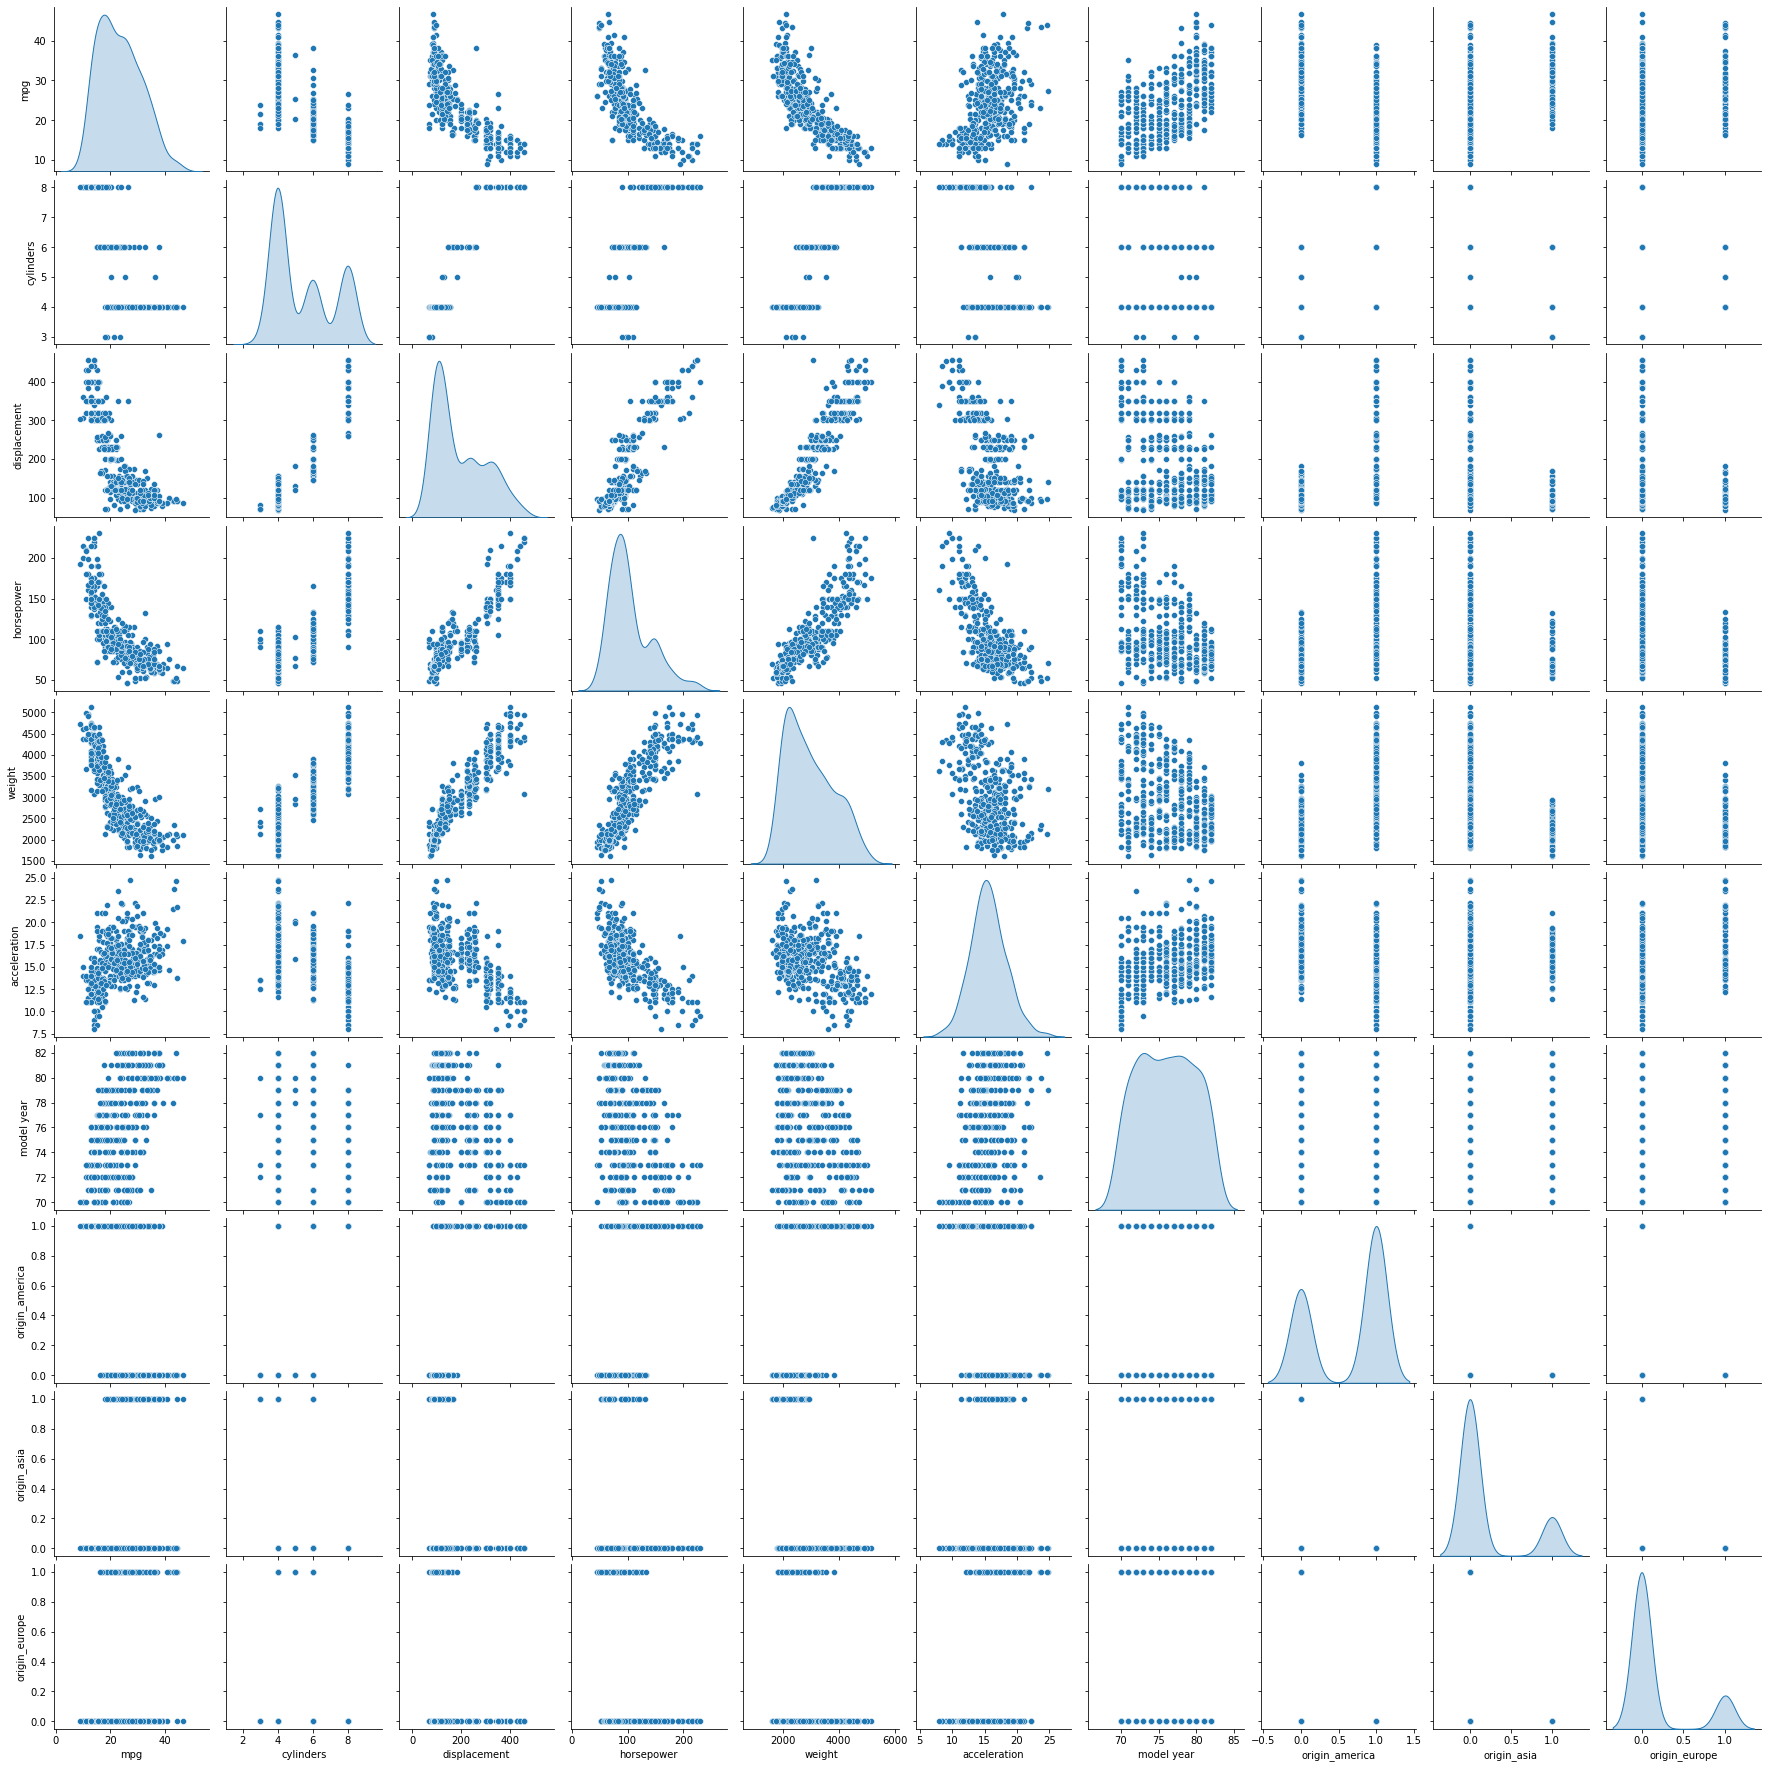

In [94]:
sns.pairplot(car_df,diag_kind='kde')

In [106]:
car_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,0,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,0,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,0,0


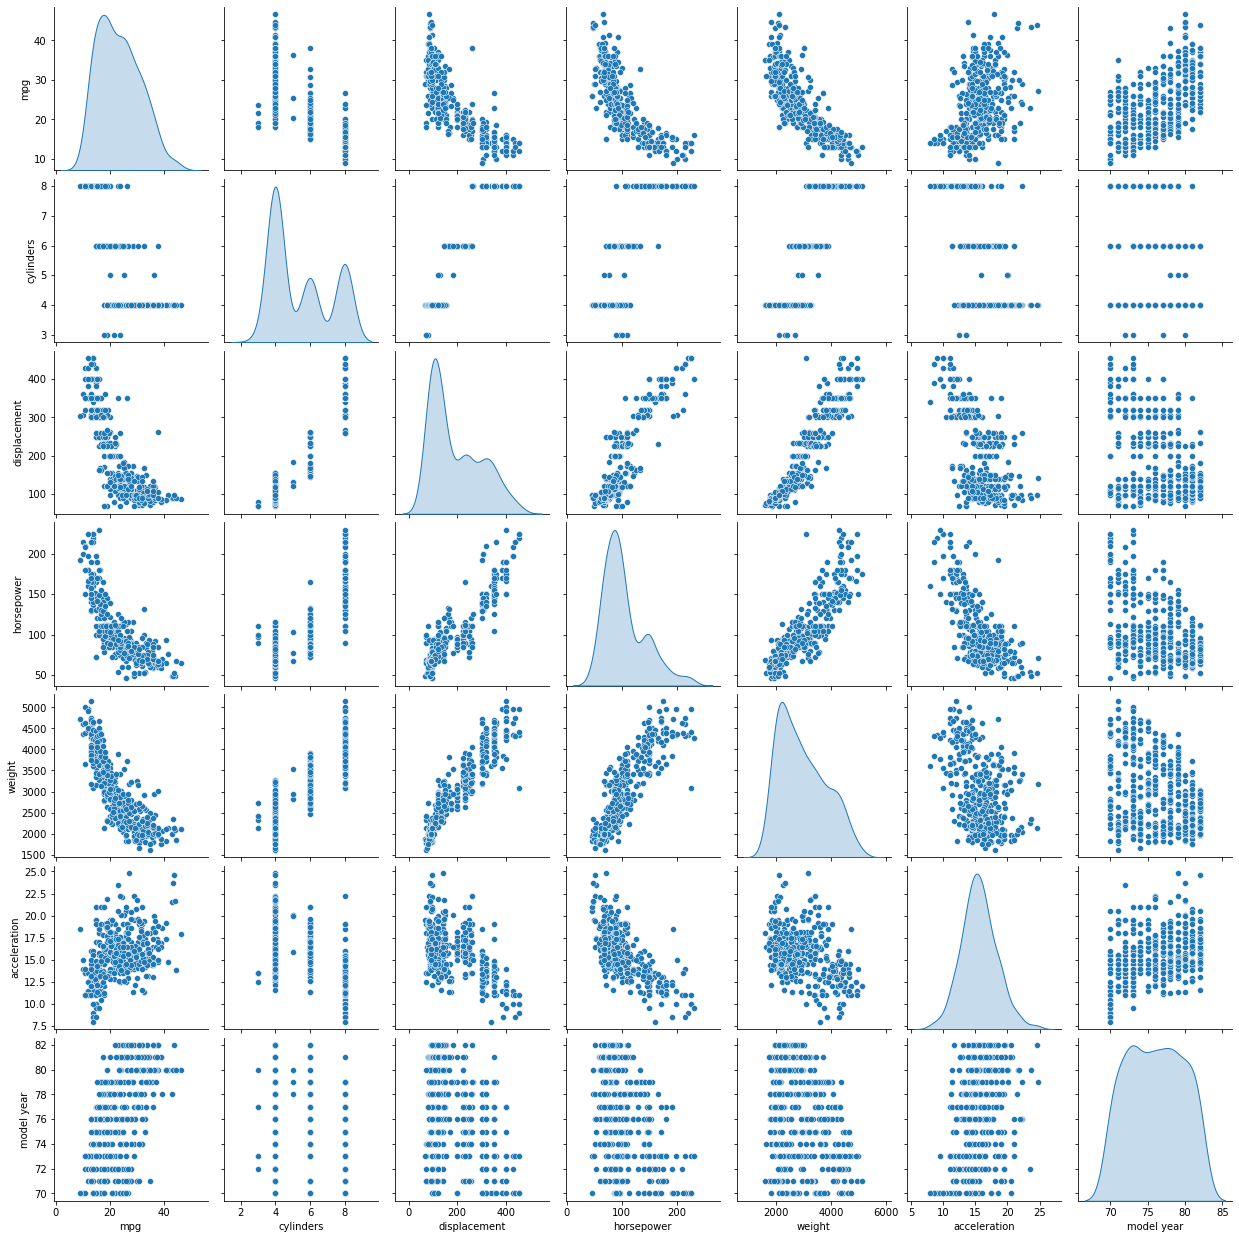

In [109]:
car_df_attr = car_df.iloc[:, 0:7]
sns.pairplot(car_df_attr, diag_kind='kde') # to plot density curve instead of his

### Observations between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assunptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity

# Split Data

In [96]:
# Lets build our own model
# independent variables
X = car_df.drop(['mpg'],axis=1)
# the dependent variable
y = car_df[['mpg']]

In [108]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1 )

# random_state=1 allows us to use the same data again and again
# test size lies between 0.15 to 0.30.
# train must be greater than test

# Fit Linear Model

In [98]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

### Here are the coefficients for each variable and the intercept

In [99]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for cylinders is -0.3948079661648341
The coefficient for displacement is 0.028945510765487608
The coefficient for horsepower is -0.021752207723547242
The coefficient for weight is -0.007352032065147365
The coefficient for acceleration is 0.061919366007618874
The coefficient for model year is 0.836933891764501
The coefficient for origin_america is -1.7988493458374297
The coefficient for origin_asia is 0.5964156907563449
The coefficient for origin_europe is 1.2024336550810852


In [100]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -19.485884771453232


### The score (R^2) for in_sample and out of sample

In [101]:
reg_model.score(X_train, y_train)

0.8141025501610559

In [102]:
# out of sample score (R^2)

reg_model.score(X_test, y_test)

0.8433135132808831

In [119]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

# We have to fit with training data and predict with test data

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.8995492105437926


In [120]:
# Out off sample (testing) R^2 is our measure of success and does improve
print(poly_clf.score(X_test2, y_test))

0.861349075272287


In [105]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 9)
(278, 46)


### Polynomial Features ( with only interaction terms ) have improved the Out of sample R^2.
### However at the cost of increasing the number of variables significantly.

## Overfitting- training data good, test data bad
## Underfitting- training data bad, test data bad